## LSTM과 GRU 셀


셀상태는 은닉상태와 다르게 다음 층으로 넘어가지 않고 LSTM 안에서만 순환한다.  
LSTM에는 삭제 게이트, 입력 게이트, 출력 게이트가 있다.

LSTM 신경망 훈련하기

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 10ms/step - loss: 0.6923 - accuracy: 0.5342 - val_loss: 0.6910 - val_accuracy: 0.5804
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6891 - accuracy: 0.6130 - val_loss: 0.6861 - val_accuracy: 0.6432
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6729 - accuracy: 0.6525 - val_loss: 0.6499 - val_accuracy: 0.6638
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6194 - accuracy: 0.7038 - val_loss: 0.6063 - val_accuracy: 0.7152
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5874 - accuracy: 0.7290 - val_loss: 0.5816 - val_accuracy: 0.7316
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5627 - accuracy: 0.7472 - val_loss: 0.5600 - val_accuracy: 0.7398
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5415 - accuracy: 0.7593 - val_loss: 0.5392 - val_accuracy: 0.7

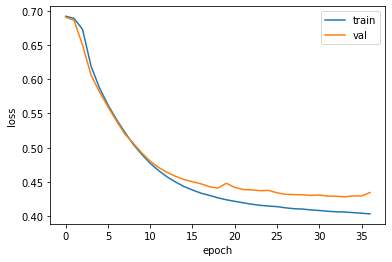

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 과대적합을 막기위해 순환층에 드롭아웃 적용하기  
드롭아웃: 은닉층에 있는 뉴런의 출력을 '랜덤'하게 꺼서 과대적합을 막고 오히려 좋은 학습을 시키는 방법  
LSTM 클래스와 SimpleRNN 클래스는 자체적으로 드롭아웃 기능을 제공하는데  
dropout 매개변수는 셀의 입력에 드롭아웃을 적용하고  
recurrent_dropout은 순환되는 은닉 상태에 드롭아웃을 적용한다.(GPU사용불가)

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6926 - accuracy: 0.5179 - val_loss: 0.6917 - val_accuracy: 0.5544
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6905 - accuracy: 0.5780 - val_loss: 0.6889 - val_accuracy: 0.6146
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6842 - accuracy: 0.6283 - val_loss: 0.6772 - val_accuracy: 0.5712
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6477 - accuracy: 0.6578 - val_loss: 0.6249 - val_accuracy: 0.7244
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6089 - accuracy: 0.7252 - val_loss: 0.5990 - val_accuracy: 0.7406
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5865 - accuracy: 0.7469 - val_loss: 0.5794 - val_accuracy: 0.7578
Epoch 7/100
313/313 [==============================] - 5s 18ms/step - loss: 0.5685 - accuracy: 0.7570 - val_loss: 0.5621 - val_accuracy: 0

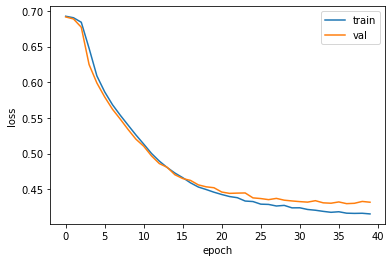

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환층 2개 연결하기  
keras에서는 마지막 셀을 제외한 층에서 모든 타임스텝의 은닉상태를 출력하려면 return_sequences = True를 설정해주면 된다.

In [ ]:
model3 =keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_5 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_6 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb= keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 23ms/step - loss: 0.6929 - accuracy: 0.5281 - val_loss: 0.6926 - val_accuracy: 0.5878
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6914 - accuracy: 0.5664 - val_loss: 0.6893 - val_accuracy: 0.6056
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6752 - accuracy: 0.6172 - val_loss: 0.6505 - val_accuracy: 0.6764
Epoch 4/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6248 - accuracy: 0.6995 - val_loss: 0.6043 - val_accuracy: 0.7182
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5891 - accuracy: 0.7222 - val_loss: 0.5747 - val_accuracy: 0.7350
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5637 - accuracy: 0.7362 - val_loss: 0.5503 - val_accuracy: 0.7450
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5400 - accuracy: 0.7510 - val_loss: 0.5318 - val_accuracy

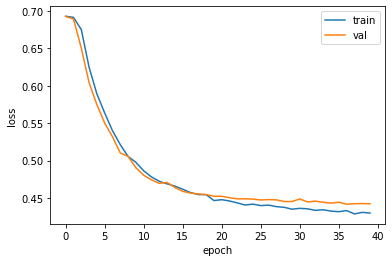

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 구조  
### Gated Recurrent Unit은 LSTM의 간소화 버전.

In [ ]:
from tensorflow import keras
model4 =keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


gru층에서 600개(16*8 + 8*8 + 8) + 가중치 외 절편 3개 * 8 -> 624


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=[val_seq, val_target], callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 9ms/step - loss: 0.6905 - accuracy: 0.5753 - val_loss: 0.6897 - val_accuracy: 0.5742
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6871 - accuracy: 0.5993 - val_loss: 0.6858 - val_accuracy: 0.5806
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6816 - accuracy: 0.6154 - val_loss: 0.6794 - val_accuracy: 0.6026
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6726 - accuracy: 0.6298 - val_loss: 0.6694 - val_accuracy: 0.6158
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6595 - accuracy: 0.6437 - val_loss: 0.6546 - val_accuracy: 0.6354
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6398 - accuracy: 0.6612 - val_loss: 0.6324 - val_accuracy: 0.6550
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6089 - accuracy: 0.6833 - val_loss: 0.5962 - val_accuracy: 0.6946

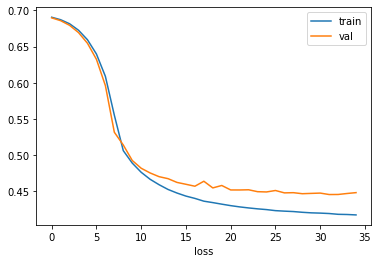

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.xlabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-gru-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 3s 4ms/step - loss: 0.4407 - accuracy: 0.7954


[0.44072800874710083, 0.7953600287437439]

best-2rnn모델이 젤 손실도 작고 정확도도 준수함

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv("eletrain.csv")
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.set_index('date_time')

In [2]:
df_train_y = df['전력사용량(kWh)']
df_train_x = df.drop('전력사용량(kWh)', axis=1)

df_test = pd.read_csv('test.csv')
df_test=df_test.set_index('date_time')

In [3]:
df_test['강수량(mm, 6시간)'].fillna(np.mean(df_test['강수량(mm, 6시간)']), inplace=True)
df_test['기온(°C)'].fillna(np.mean(df_test['기온(°C)']), inplace=True)
df_test['풍속(m/s)'].fillna(np.mean(df_test['풍속(m/s)']), inplace=True)
df_test['습도(%)'].fillna(np.mean(df_test['습도(%)']), inplace=True)
df_test['일조(hr, 3시간)'].fillna(np.mean(df_test['일조(hr, 3시간)']), inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10080 entries, 2020-08-25 00 to 2020-08-31 23
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   기온(°C)        10080 non-null  float64
 2   풍속(m/s)       10080 non-null  float64
 3   습도(%)         10080 non-null  float64
 4   강수량(mm, 6시간)  10080 non-null  float64
 5   일조(hr, 3시간)   10080 non-null  float64
 6   비전기냉방설비운영     10080 non-null  int64  
 7   태양광보유         10080 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 708.8+ KB


In [4]:
train_x = np.array(df_train_x).reshape(df_train_x.shape[0], df_train_x.shape[1],1)

Epoch 1/100
2051/2051 [==============================] - 15s 4ms/step - loss: 18909038.0000 - val_loss: nan
Epoch 2/100
2051/2051 [==============================] - 8s 4ms/step - loss: 17559962.0000 - val_loss: nan
Epoch 3/100
2051/2051 [==============================] - 8s 4ms/step - loss: 16357965.0000 - val_loss: nan
Epoch 4/100
2051/2051 [==============================] - 10s 5ms/step - loss: 15278737.0000 - val_loss: nan
Epoch 5/100
2051/2051 [==============================] - 9s 4ms/step - loss: 14327102.0000 - val_loss: nan
Epoch 6/100
2051/2051 [==============================] - 8s 4ms/step - loss: 13494397.0000 - val_loss: nan
Epoch 7/100
2051/2051 [==============================] - 8s 4ms/step - loss: 12780300.0000 - val_loss: nan
Epoch 8/100
2051/2051 [==============================] - 9s 4ms/step - loss: 12176893.0000 - val_loss: nan
Epoch 9/100
2051/2051 [==============================] - 8s 4ms/step - loss: 11676806.0000 - val_loss: nan
Epoch 10/100
2051/2051 [===========

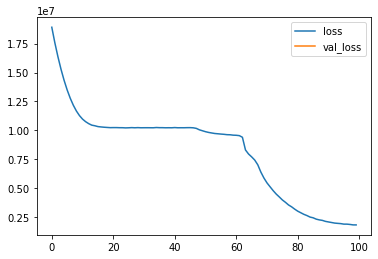

In [5]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD, Adadelta, Adam, RMSprop
from keras.callbacks import EarlyStopping
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

model = keras.Sequential()
model.add(keras.layers.LSTM(units=128, input_shape = (train_x.shape[1], train_x.shape[2])))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(train_x, df_train_y, validation_split=0.1, batch_size=10, epochs=100)
pd.DataFrame.from_dict(history.history).plot()

In [7]:
result = model.predict(df_test)

315/315 [==============================] - 1s 2ms/step


In [15]:
submission=pd.read_csv('sample_submission4.csv')

In [16]:
submission['answer'] = result.reshape([-1,1])
submission

,num_date_time,answer
0,1 2020-08-25 00,8496.607422
1,1 2020-08-25 01,8496.467773
2,1 2020-08-25 02,8496.467773
3,1 2020-08-25 03,8444.601562
4,1 2020-08-25 04,8496.467773
...,...,...
10075,60 2020-08-31 19,8309.539062
10076,60 2020-08-31 20,8309.539062
10077,60 2020-08-31 21,8175.521484
10078,60 2020-08-31 22,8309.539062
